<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


<span style = 'color: green'><b>In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.</b></span>

<span style = 'color: green'><b>In this lab, you will perform Exploratory Data Analysis and Feature Engineering.</b></span>


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

<span style = 'color: green'><b>Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`</b></span>

*   <b>Exploratory Data Analysis</b>
*   <b>Preparing Data  Feature Engineering</b>


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [ ]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

In [4]:
# This limits the number of threads to 2, avoiding the memory leak.
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [7]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [6]:
import requests
import io

# Download CSV file from URL
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
dataset_part_2_csv = io.StringIO(response.text)
# When using requests.get(url), the CSV is downloaded as a string (response.text). To make it behave like a file so pandas
# can read it, you wrap it in io.StringIO().
# Read into pandas DataFrame
df=pd.read_csv(dataset_part_2_csv)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


<span style = 'color: green'><b>First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.</b></span>

<span style = 'color: darkred'><b>We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.</b></span>


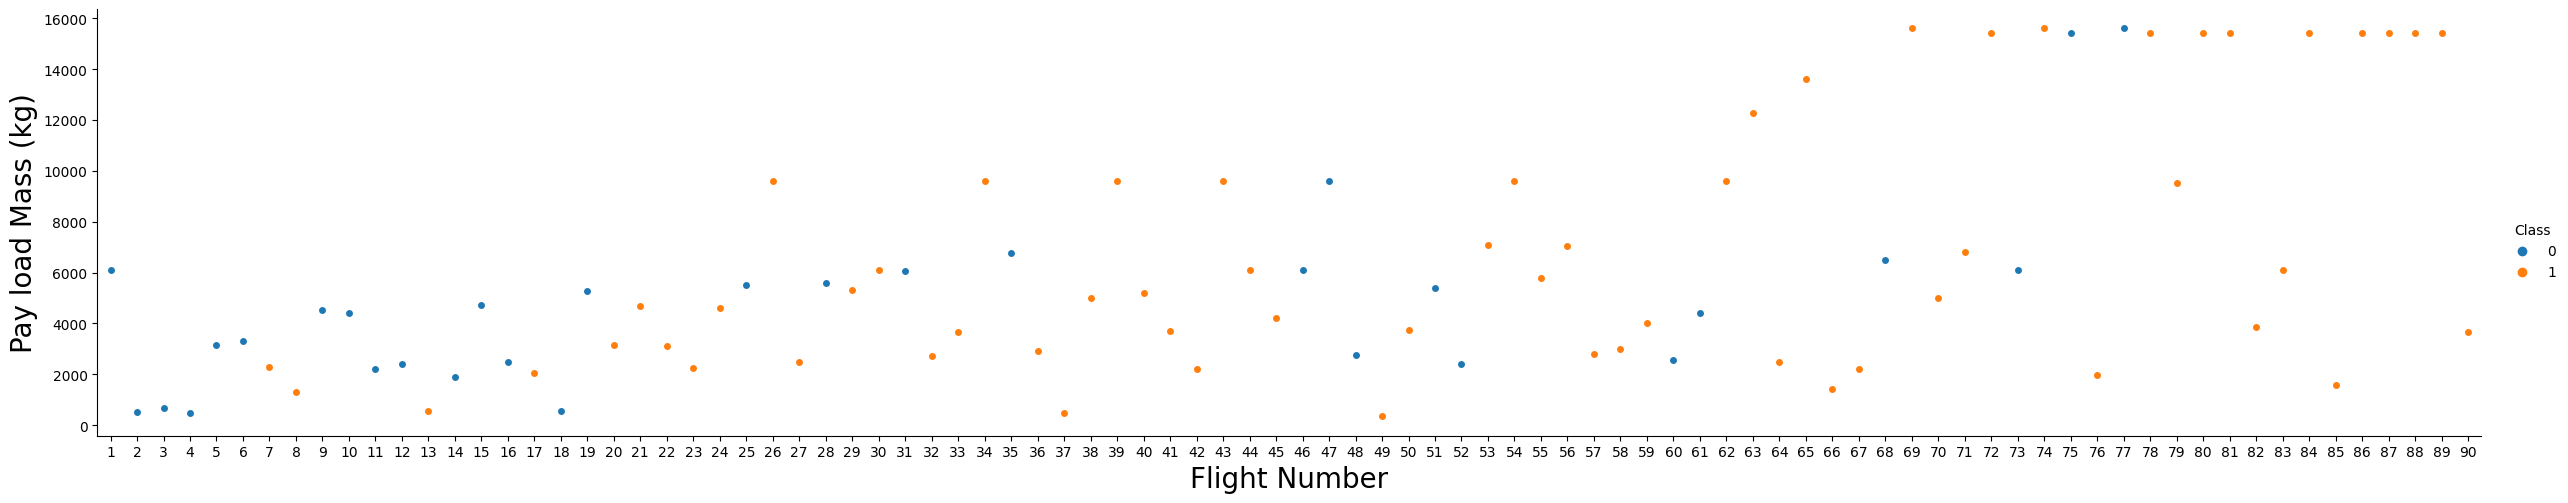

In [8]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()
# Seaborn's catplot() is a high-level categorical plot function—it is designed to show relationships between categorical and 
# numerical variables. In this case:
  # FlightNumber is treated as categorical (even if it's numeric), because it's being used to distinguish individual flights.
  # PayloadMass is numerical, plotted on the Y-axis.
  # hue="Class" adds a categorical color separation.
  # So this plot becomes a categorical scatter plot (specifically, a strip plot by default), where:
     # Each "category" on the x-axis is a different flight.
     # We show the distribution or variation of payload mass by flight.
     # Colored dots (hue) help you see which launches succeeded or failed.

<b>Next, let's drill down to each site visualize its detailed launch records.</b>


### <span style = 'color: blue'>TASK 1: Visualize the relationship between Flight Number and Launch Site</span>


<span style = 'color: purple'><b>Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code></b></span>


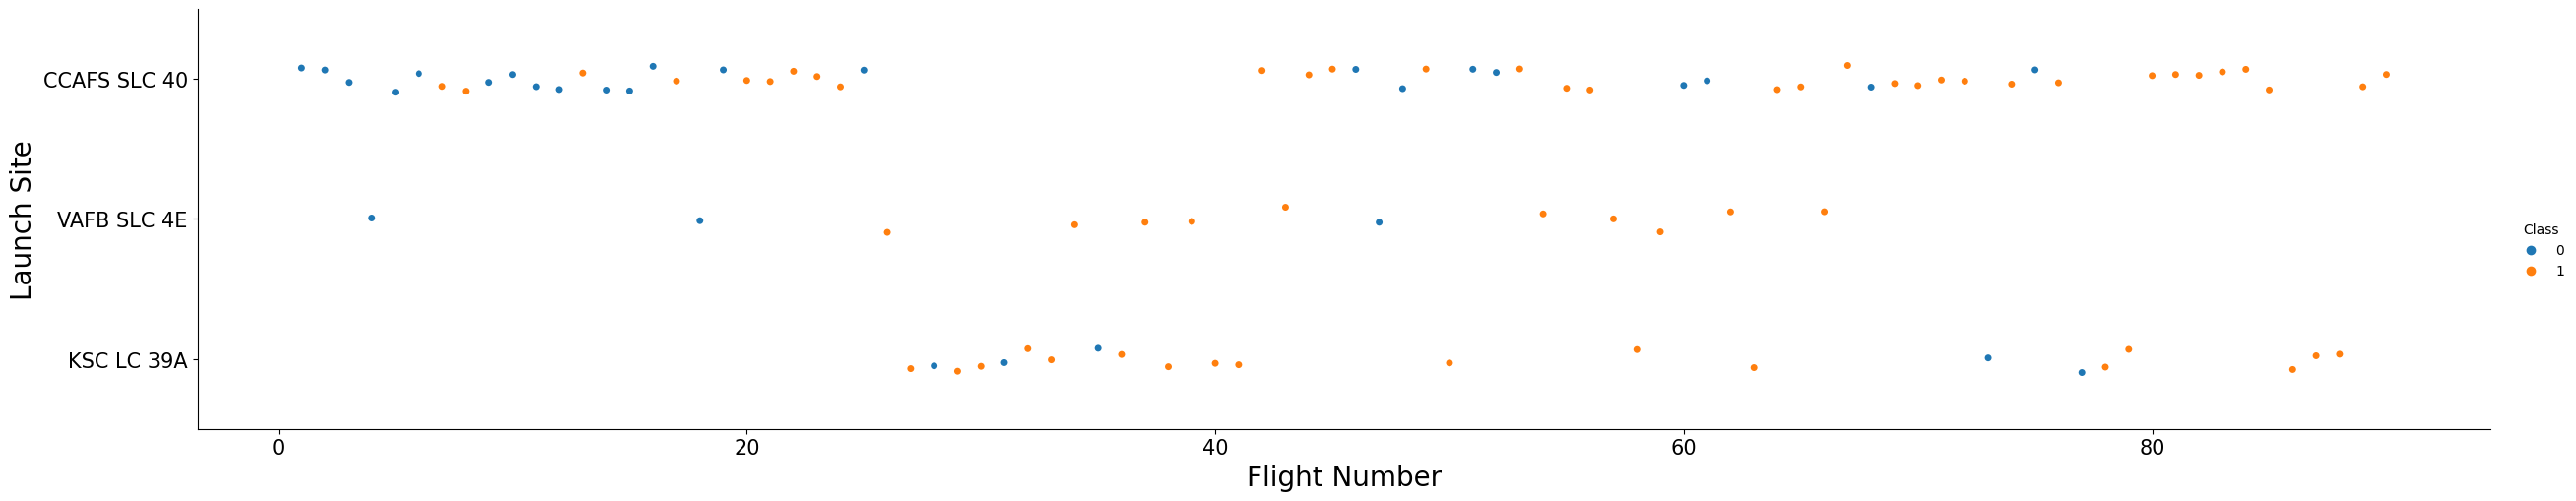

In [9]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5, height=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<span style = 'color: blue'><b>Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.</b></span>

#### <span style = 'color: blue'>What You Can Observe:</span>
  - <span style = 'color: green'><b>CCAFS SLC 40 was used most frequently.</b></span>
  - <span style = 'color: green'><b>KSC LC 39A has a moderate number of launches.</b></span>
  - <span style = 'color: green'><b>VAFB SLC 4E has fewer launches in comparison.</b></span>
  - <span style = 'color: green'><b>Over time, most launches became successful (more orange on the right).</b></span>
  - <span style = 'color: green'><b>Some early launches (low flight numbers) had more failures (more blue on the left).</b></span>
  
<span style = 'color: gray'><b>Class (Success/Failure)</b></span>

### <span style = 'color: blue'>TASK 2: Visualize the relationship between Payload Mass and Launch Site</span>


<span style = 'color: purple'><b>We also want to observe if there is any relationship between launch sites and their payload mass.</b></span>

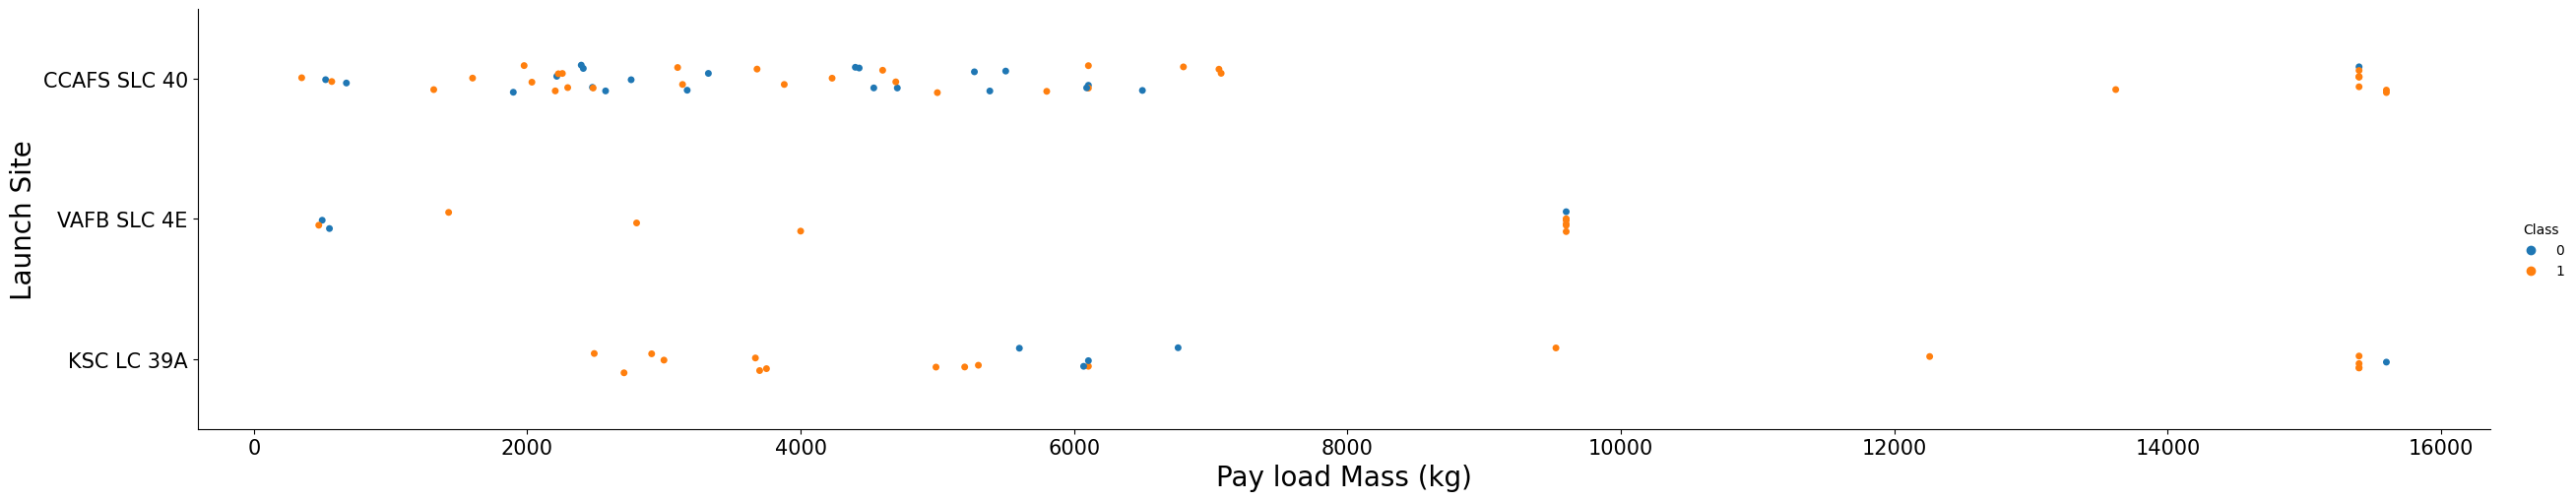

In [10]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class
# value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5, height=5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<span style = 'color: green'><b>Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).</b></span>

### <span style = 'color: blue'>TASK  3: Visualize the relationship between success rate of each orbit type</span>


<span style = 'color: purple'><b>Next, we want to visually check if there are any relationship between success rate and orbit type.</b></span>

<span style = 'color: purple'><b>Let's create a `bar chart` for the sucess rate of each orbit</b></span>

<span style = 'color: darkred'><b>The success rate is typically calculated as:</b></span>
<span style = 'color: darkred'><br><b>Success Rate = Number of Successful Launches/ Total Number of Launches</b></br></span>

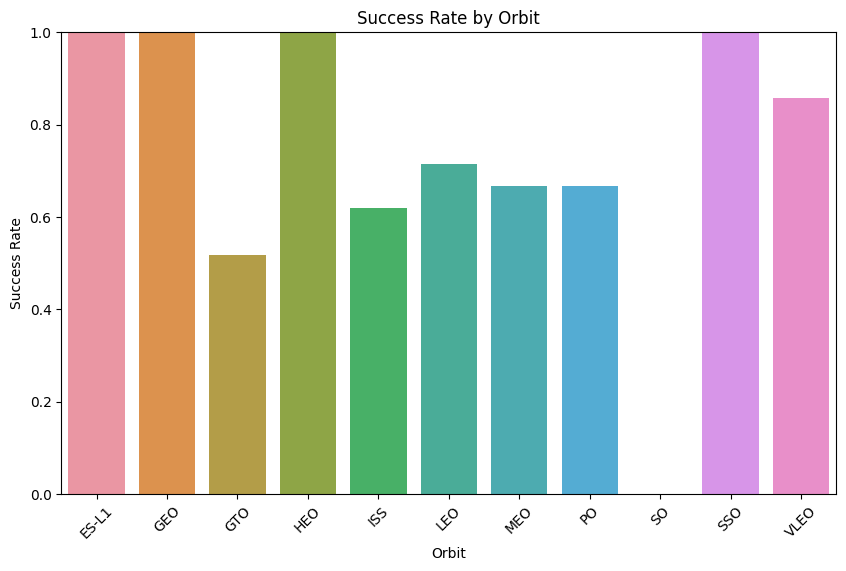

In [16]:
# Plot the relationship between success rate of each orbit type

# Step 1: Group by 'Orbit' and calculate success rate
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# Step 2: Rename the column for clarity
success_rate_by_orbit.rename(columns={'Class': 'Success Rate'}, inplace=True)

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=success_rate_by_orbit, x='Orbit', y='Success Rate')
plt.title('Success Rate by Orbit')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Success rate ranges from 0 to 1
plt.show()

<span style = 'color: blue'><b>Analyze the plotted bar chart to identify which orbits have the highest success rates.</b></span>

 <span style = 'color: green'><b>- ES-L1, GEO, HEO, and SSO had perfect success rates (1.0 or 100%), meaning all launches to these orbits succeeded.</b></span>
<span style = 'color: green'><br><b>- VLEO (Very Low Earth Orbit) also shows a strong success rate, slightly below 1.0 (~87%).</b></br></span>
<span style = 'color: green'><b>- GTO (Geostationary Transfer Orbit) had the lowest success rate, around 52%, indicating nearly half of its missions failed.</b></span>
<span style = 'color: green'><br><b>- Orbit 'SO' appears in the chart with no bar visible, which could mean:</b></br></span>
   <span style = 'color: green'><b>- It had no recorded launches in the dataset (0 entries), or</b></span>
    <span style = 'color: green'><br><b>- It had only failures (0% success), though this is less likely if it's completely missing.</b></br></span>

### <span style = 'color: blue'>TASK  4: Visualize the relationship between FlightNumber and Orbit type</span>


<span style = 'color: purple'><b>For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.</b></span>


<Figure size 1000x600 with 0 Axes>

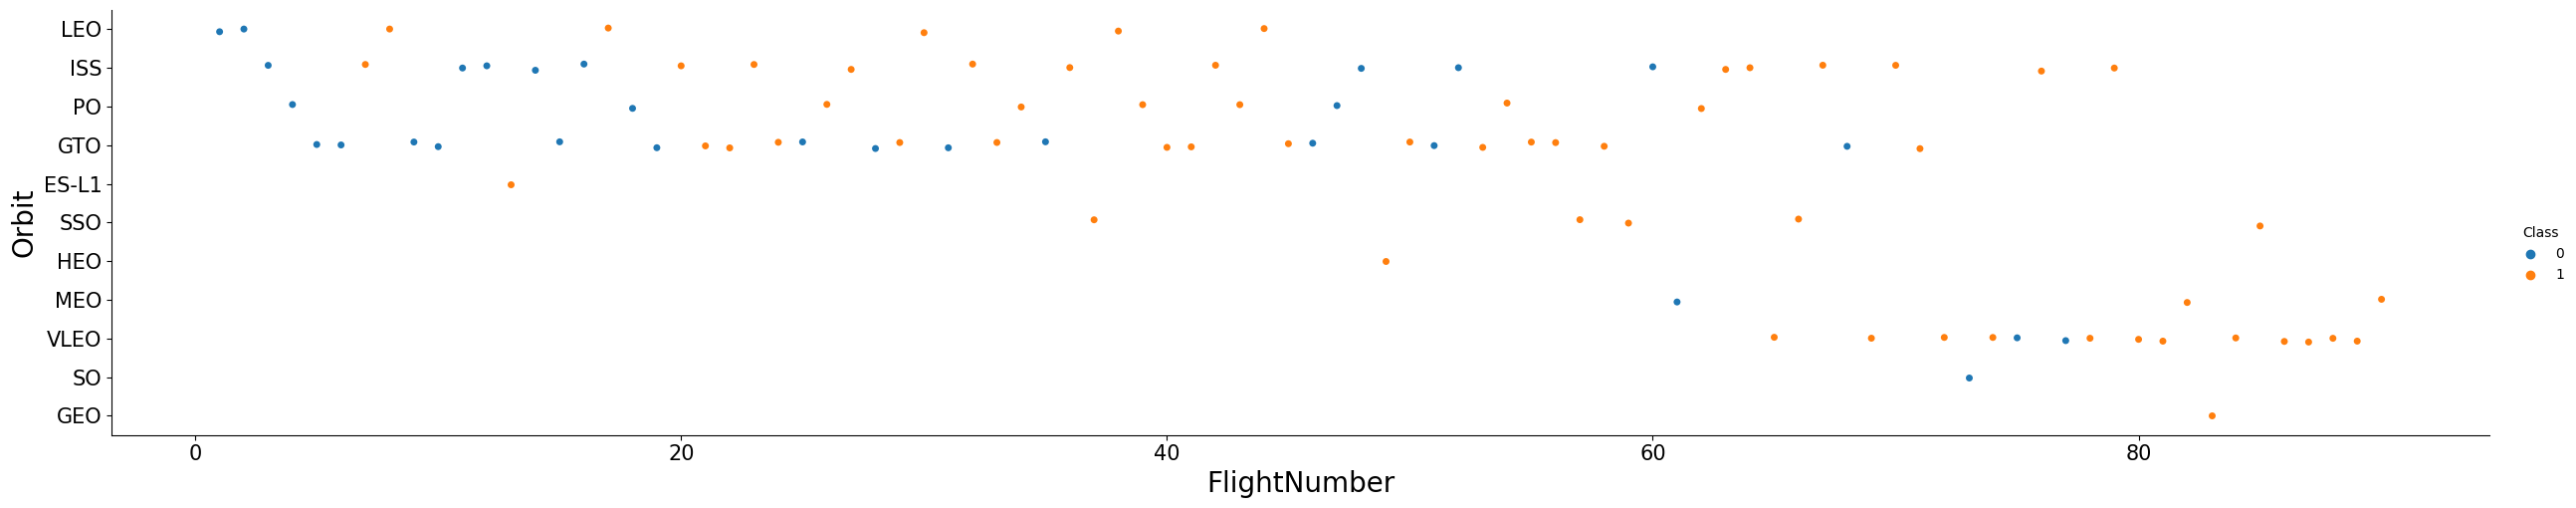

In [19]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(10, 6))
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5, height=5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<span style = 'color: green'><b>You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.</b></span>


### <span style = 'color: blue'>TASK  5: Visualize the relationship between Payload Mass and Orbit type</span>


<span style = 'color: purple'><b>Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type</b></span>


<Figure size 1000x800 with 0 Axes>

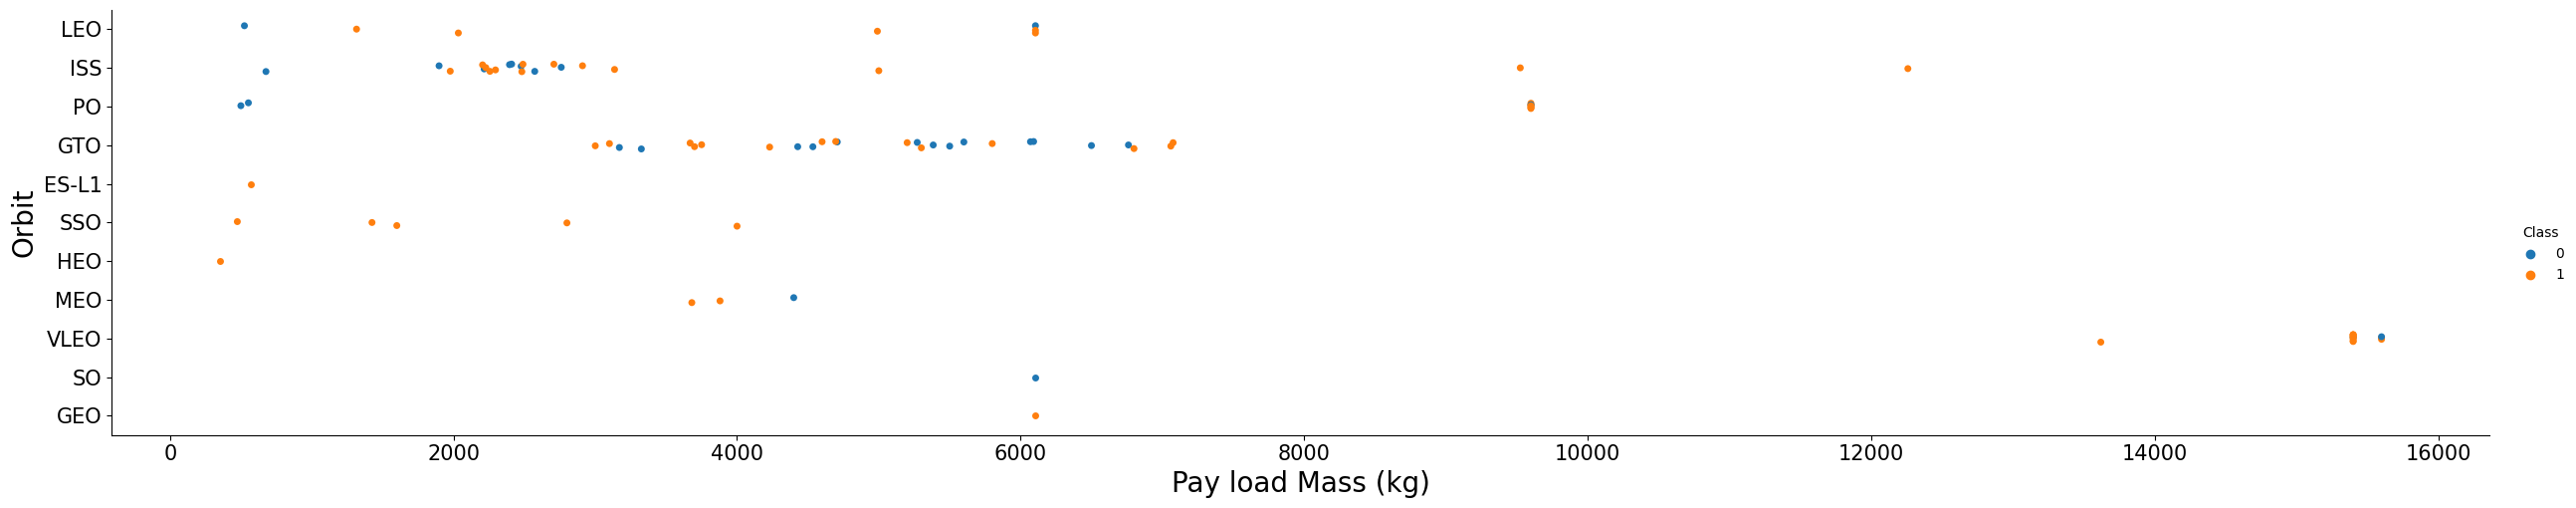

In [21]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(10, 8))
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5, height=5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<span style = 'color: green'><b>With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.</b></span>

<span style = 'color: green'><b>However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.</b></span>


### <span style = 'color: blue'>TASK  6: Visualize the launch success yearly trend</span>


<span style = 'color: purple'><b>You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.</b></span>


<span style = 'color: purple'><b>The function will help you get the year from the date:</b></span>


In [22]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
   

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


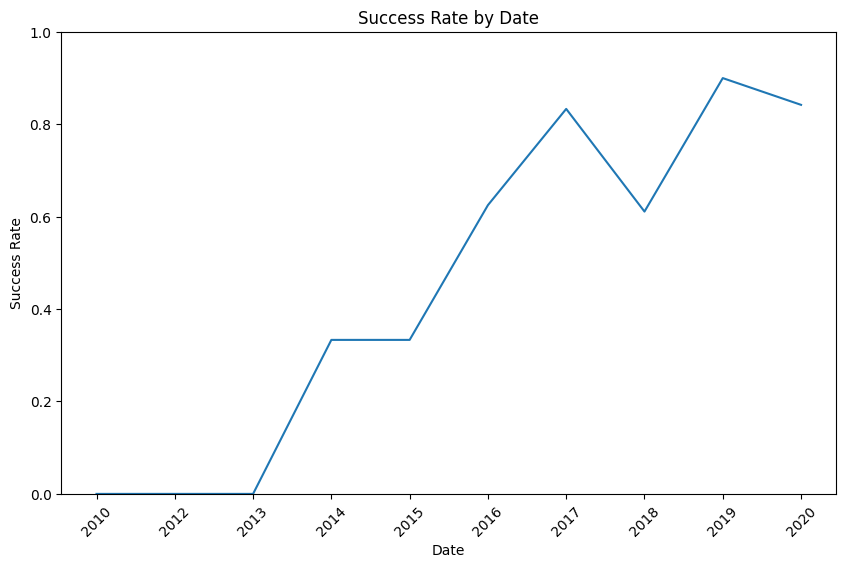

In [24]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Step 1: Group by 'Orbit' and calculate success rate
success_rate_by_date = df.groupby('Date')['Class'].mean().reset_index()

# Step 2: Rename the column for clarity
success_rate_by_date.rename(columns={'Class': 'Success Rate'}, inplace=True)

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=success_rate_by_date, x='Date', y='Success Rate')
plt.title('Success Rate by Date')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Success rate ranges from 0 to 1
plt.show()

<span style = 'color: green'><b>you can observe that the sucess rate since 2013 kept increasing till 2020</b></span>


## <span style = 'color: green'>Features Engineering</span>


<span style = 'color: green'><b>By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.</b></span>


In [25]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### <span style = 'color: blue'>TASK  7: Create dummy variables to categorical columns</span>


<span style = 'color: purple'><b>Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.</b></span>


In [33]:
# Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], dtype=int)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <span style = 'color: blue'>TASK  8: Cast all numeric columns to `float64`</span>


<span style = 'color: purple'><b>Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code></b></span>


In [34]:
# Cast all numeric columns to float64
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<span style = 'color: purple'><b>We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.</b></span>


In [37]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
